In [1]:
from bauer.models import MagnitudeComparisonRegressionModel
from bauer.utils.data import load_garcia2022
import numpy as np

df = load_garcia2022()

In [2]:
df['isi'] = np.round(df['isistimdiff'] / 500) / 2

In [3]:
model = MagnitudeComparisonRegressionModel(df, regressors={'n1_evidence_sd':'0+C(isi)'})

In [4]:
model.build_estimation_model()

{'n1_prior_mu': mean, 'n1_prior_std': std, 'n2_prior_std': std, 'threshold': 0.0, 'n2_prior_mu': Sum{axis=[1], acc_dtype=float64}.0, 'n1_evidence_sd': Elemwise{softplus,no_inplace}.0, 'n2_evidence_sd': Elemwise{softplus,no_inplace}.0}


In [5]:
idata = model.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n1_evidence_sd_mu, n1_evidence_sd_sd, n1_evidence_sd_offset, n2_evidence_sd_mu, n2_evidence_sd_sd, n2_evidence_sd_offset, n2_prior_mu_mu, n2_prior_mu_sd, n2_prior_mu_offset]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 199 seconds.


In [8]:
import seaborn as sns
from bauer.utils.bayes import softplus
import matplotlib.pyplot as plt

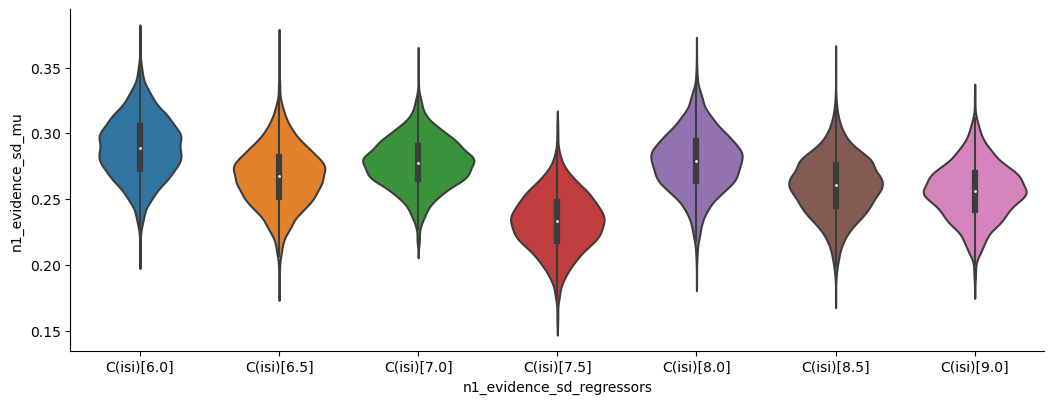

In [9]:
tmp = softplus(idata['posterior']['n1_evidence_sd_mu']).to_dataframe().reset_index()

fac = sns.catplot(data=tmp.reset_index(), x='n1_evidence_sd_regressors', y='n1_evidence_sd_mu', kind='violin', apect=3.)

fac.fig.set_size_inches(12, 4)
# plt.axhline(0, c='k', ls='--')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_37429/2688031769.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmp['C(isi)[6.0]'] - tmp['C(isi)[7.5]'])


<AxesSubplot: ylabel='Density'>

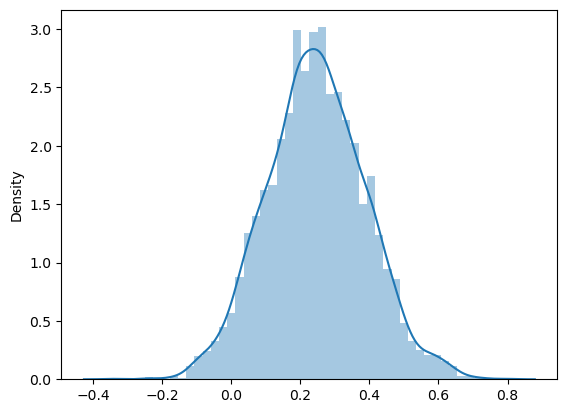

In [11]:
tmp = idata.posterior['n1_evidence_sd_mu'].to_dataframe().unstack(-1).droplevel(0, 1)

sns.distplot(tmp['C(isi)[6.0]'] - tmp['C(isi)[7.5]'])